In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

El código en esencia es el mismo que el de la clase anterior pero con una biblioteca diferente:


In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import MeanShift

warnings.filterwarnings("ignore")

Obtención de cluster:


In [3]:
dataset = pd.read_csv("../data/candy.csv")

X = dataset.drop("competitorname", axis=1)
mean_shift = MeanShift(bandwidth=None)
mean_shift.fit(X)
print(mean_shift.labels_)
# Aqui el algoritmo nos devolvio 3 cluster, porque le parecio que esa era la cantidad
# Correcta teniendo en cuenta como se distribuyen la densidad de nuestros datos
print(max(mean_shift.labels_))
print("=" * 64)
# Imprimamos la ubicacion de los centroides que puso sobre nuestros datos.
# Hay que recordar que estos algoritmos crean un centro y apartir de ahi se ajustan a todos los datos que los rodean
print(mean_shift.cluster_centers_)
cname = "meanshift"
dataset[cname] = mean_shift.labels_
print("=" * 64)
print(dataset.head())

[2 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 2 1 2 0 1 2 0 0 1 2 2 0 1 2
 2 2 1 1 1 2 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 1 0 0 2 2 2 1 2 0 0 0 0 1
 1 0 0 1 1 2 0 0 0 0 1]
2
[[2.25000000e-01 5.75000000e-01 1.00000000e-01 2.50000000e-02
  5.00000000e-02 2.50000000e-02 3.00000000e-01 1.00000000e-01
  5.50000000e-01 4.57599993e-01 3.67824996e-01 4.10442122e+01]
 [4.68750000e-01 5.00000000e-01 1.25000000e-01 1.56250000e-01
  9.37500000e-02 6.25000000e-02 1.25000000e-01 3.12500000e-01
  5.31250000e-01 4.57281243e-01 4.67874998e-01 5.21138597e+01]
 [8.26086957e-01 1.73913043e-01 3.04347826e-01 3.04347826e-01
  1.73913043e-01 1.73913043e-01 0.00000000e+00 5.21739130e-01
  4.34782609e-01 5.81391293e-01 6.38086963e-01 6.47120799e+01]]
  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0  

Gráfica de pares:


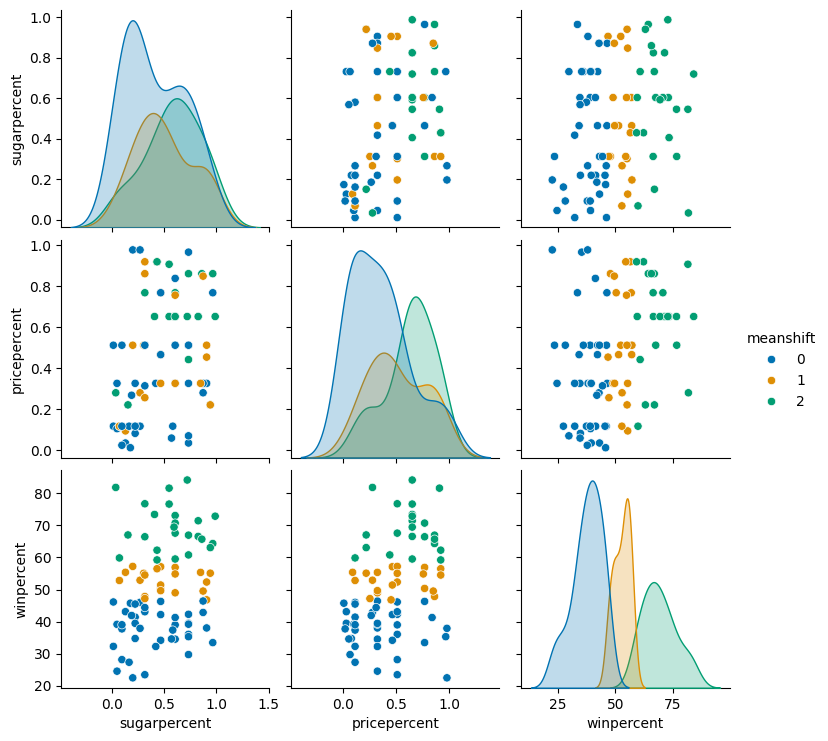

In [4]:
sns.pairplot(
    dataset[["sugarpercent", "pricepercent", "winpercent", cname]],
    hue=cname,
    palette="colorblind",
)
plt.show()

El algoritmo nos devolvió 3 clusters, porque le pareció que esa era la cantidad correcta teniendo en cuenta como se distrubuye la densidad de nuestros datos. Podemos ver eso mismo en el gráfico anterior.


Se observan los 3 diferentes colores, clusters generados automáticamente por el algoritmo MeanShift. Se puede observar una clara clusterizacion cuando se compara respecto a winpercent las variables pricepercent, sugarpercent.

NOTA: En la documentación [(en Scalability)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) se advierte que el algoritmo tiene una complejidad algorítmica que escala a O(T\*n^2) a medida que el número de registros aumenta.
